### Warehouse Search 1

#### Generate environment

- Regular wharehouse (no paths blocked)
    - Number of obsctacles is static
- Random wharehouse (paths can be blocked)
    - Number of obstacles can be changed 
- Dimensions can be changed
- Only one robot is working
- Only one package is retrieved

In [8]:
from src.environment import Environment, WarehouseTypeEnum
from src.algorithms import Search, AlgorithmTypeEnum, HeuristicEnum
from src.utils import visualize_warehouse

env = Environment(WarehouseTypeEnum.Regular,rows = 180, cols = 180)
# env = Environment.load_from_file("./src_cuda/file.txt")
# env = Environment(WarehouseTypeEnum.Random,rows = 1000, cols = 1000, obstacle_count=2000)

### Uninformed search

- #### **Breadth First search (BFS) algorithm**

Cost to Package:  131.0  units of time
Solution found with cost of:  264.0  units of time
Search Time:  0.20755982398986816 seconds
Total Time:  264.20755982398987 seconds (assuming unit of time is second)  with  Breadth First Search (BFS)


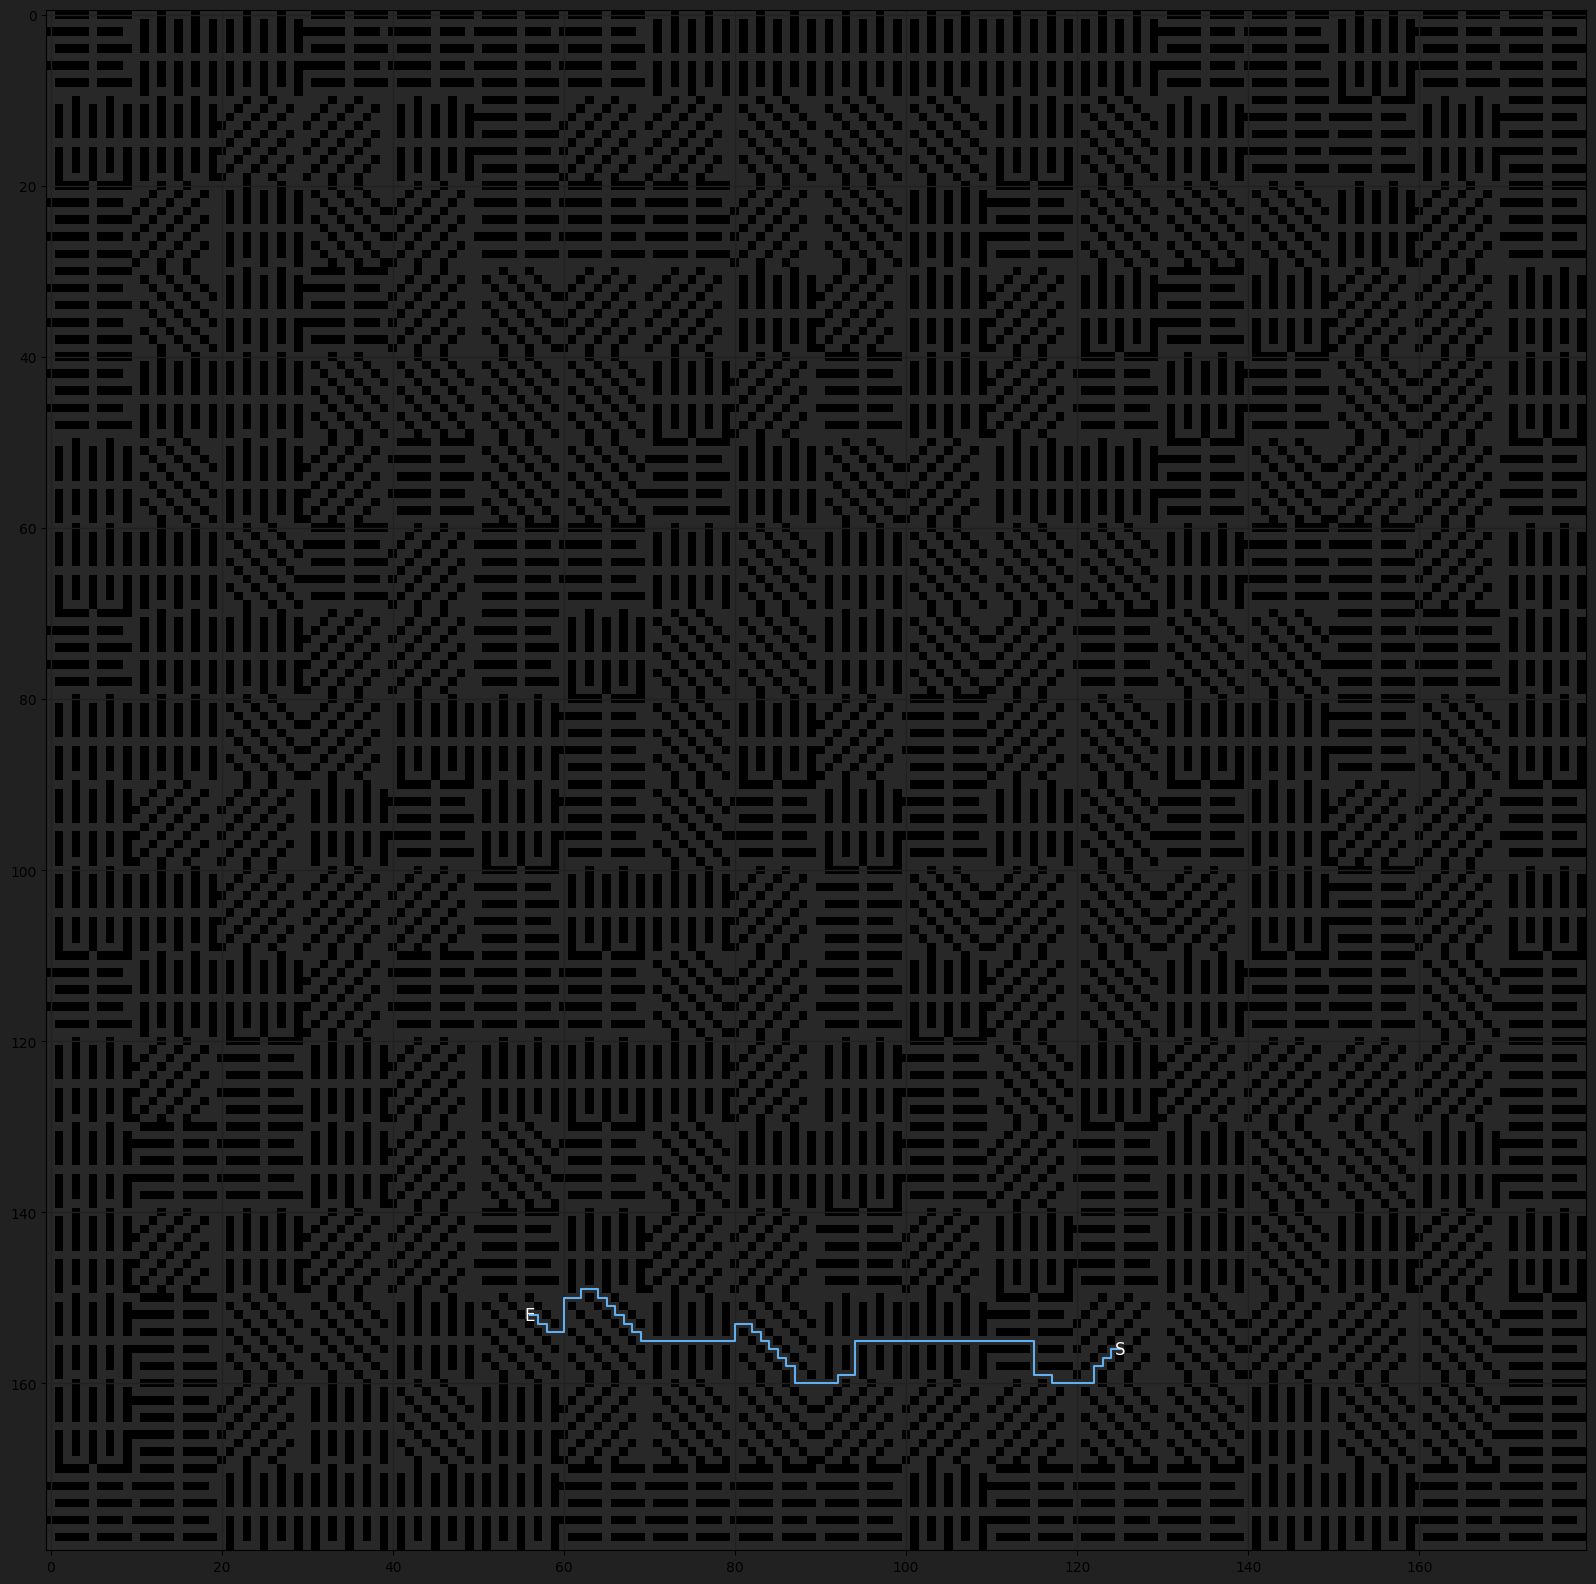

In [10]:
search_bfs = Search(AlgorithmTypeEnum.BFS, env, HeuristicEnum.MANHATTAN)
search_bfs.print_cost()

visualize_warehouse(env.map, search_bfs.path)

- #### **Diskstra's search algorithm**

Cost to Package:  126.0  units of time
Solution found with cost of:  254.0  units of time
Search Time:  0.15103411674499512 seconds
Total Time:  254.151034116745 seconds (assuming unit of time is second)  with  Dijkstra's Search


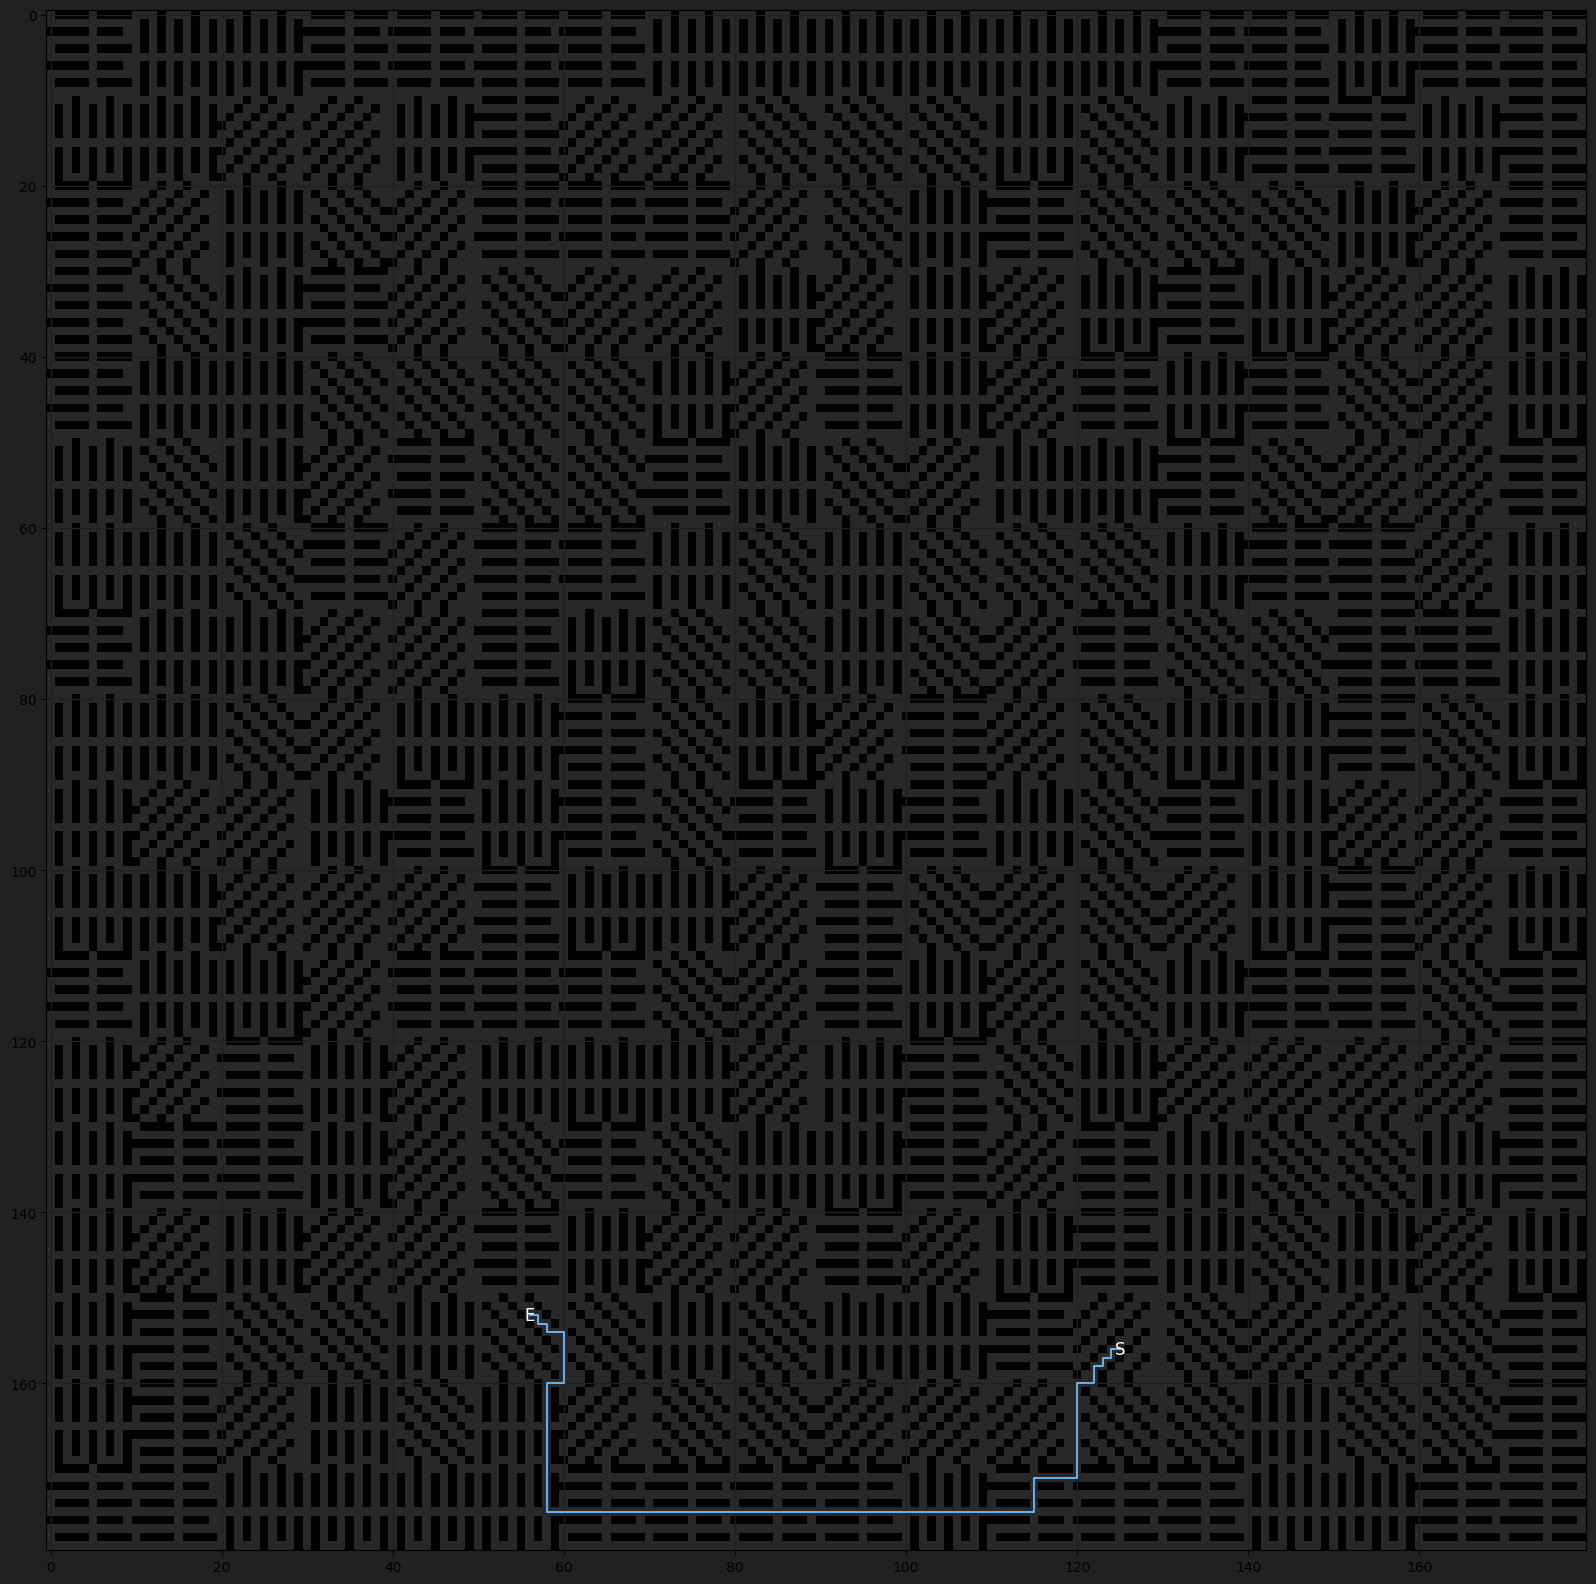

In [11]:
search_dijkstra = Search(AlgorithmTypeEnum.DIJKSTRA, env, HeuristicEnum.MANHATTAN)
search_dijkstra.print_cost()

visualize_warehouse(env.map, search_dijkstra.path)

### Informed search

- #### **A * search algorithm**

Cost to Package:  126.0  units of time
Solution found with cost of:  254.0  units of time
Search Time:  0.06409192085266113 seconds
Total Time:  254.06409192085266 seconds (assuming unit of time is second)  with  A* Search


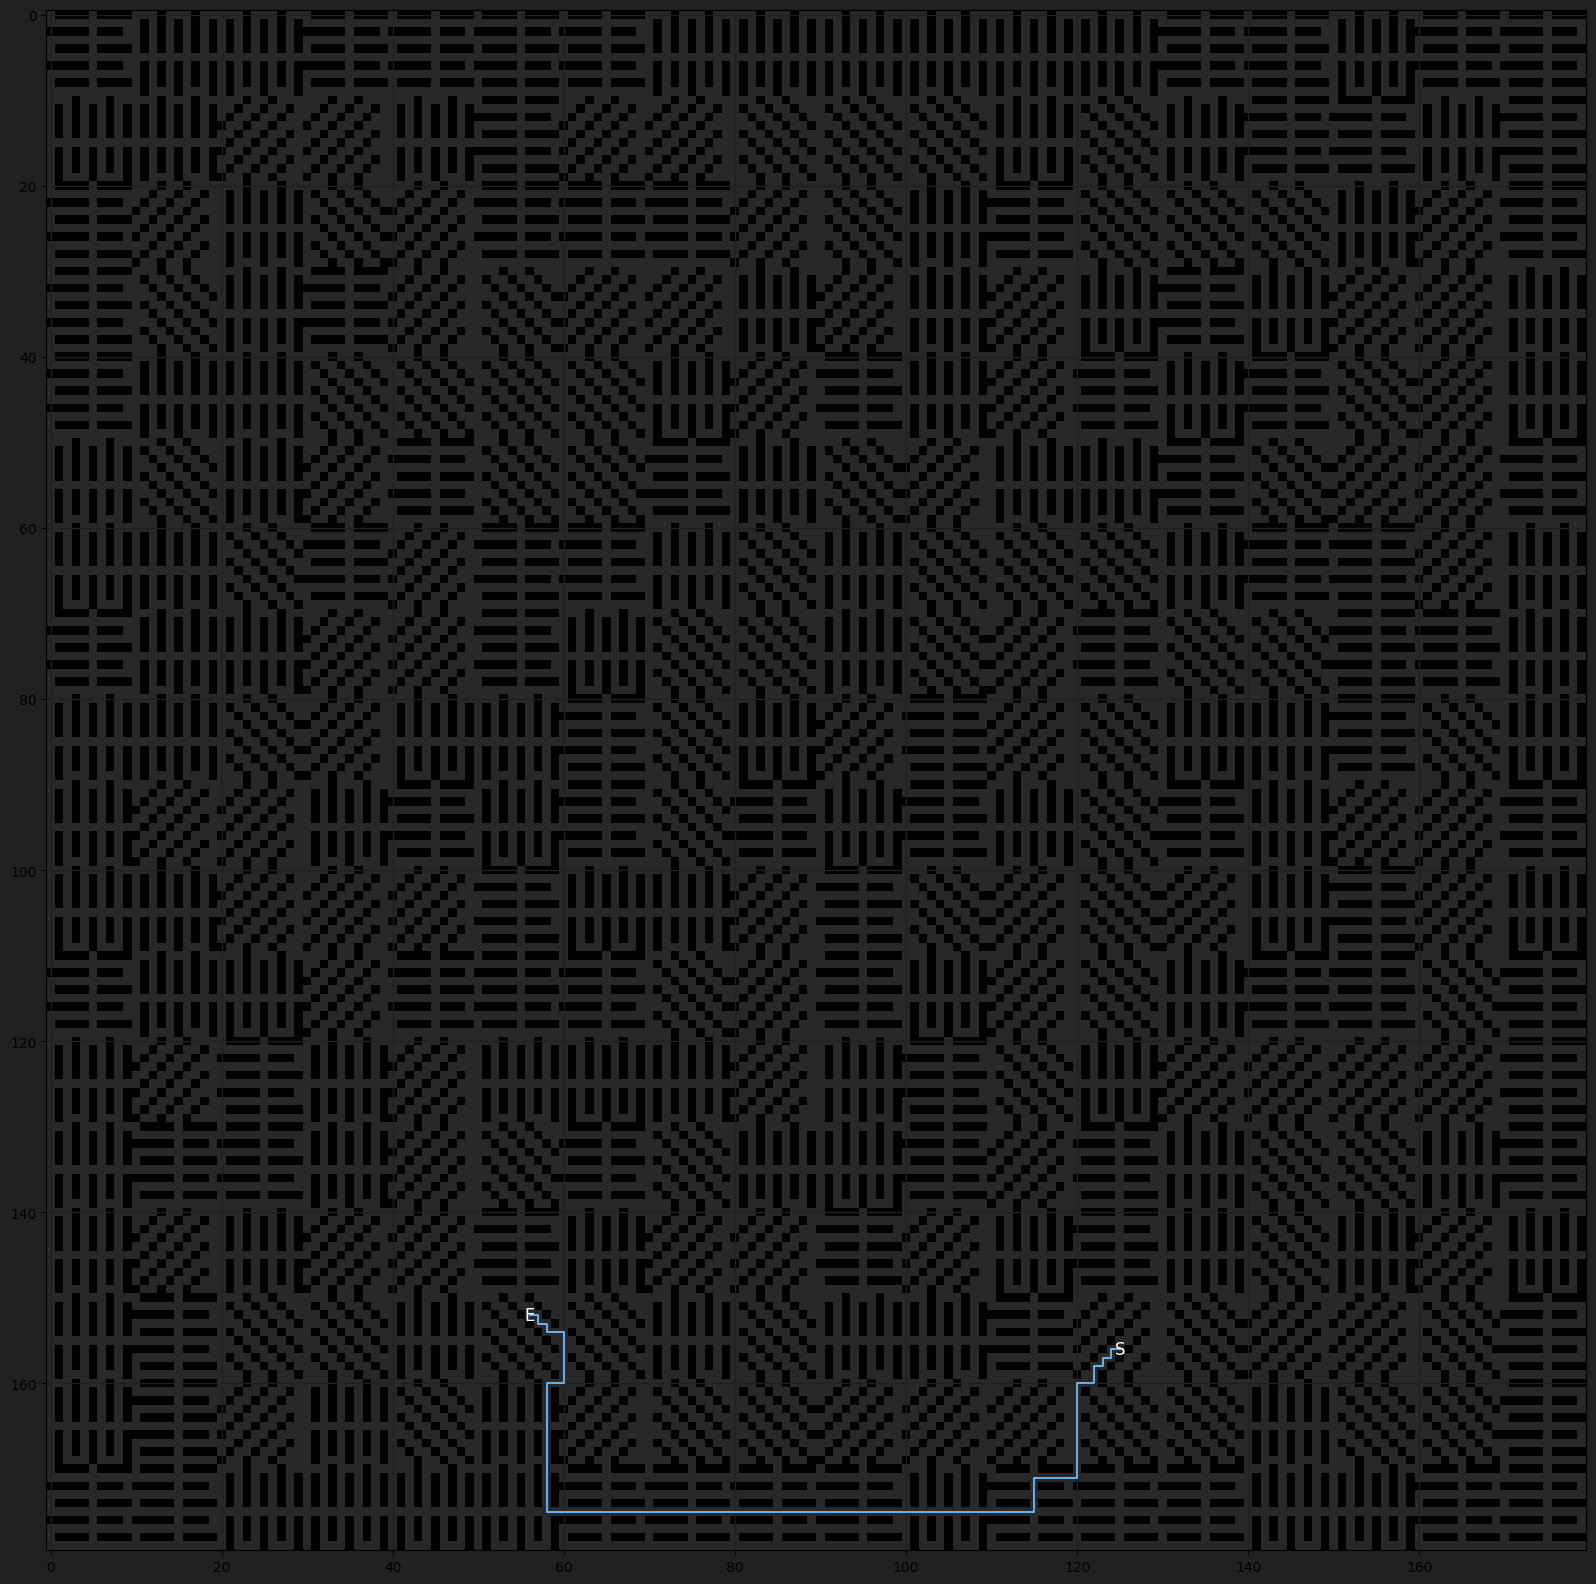

In [13]:
search_a = Search(AlgorithmTypeEnum.A_STAR, env, HeuristicEnum.MANHATTAN)

search_a.print_cost()

visualize_warehouse(env.map, search_a.path)

- #### **Iterative Deepening A * (IDA) search algorithm**

Cost to Package:  126.0  units of time
Solution found with cost of:  254.0  units of time
Search Time:  0.05620384216308594 seconds
Total Time:  254.0562038421631 seconds (assuming unit of time is second)  with  Iterative Deepening A* (IDA) Search


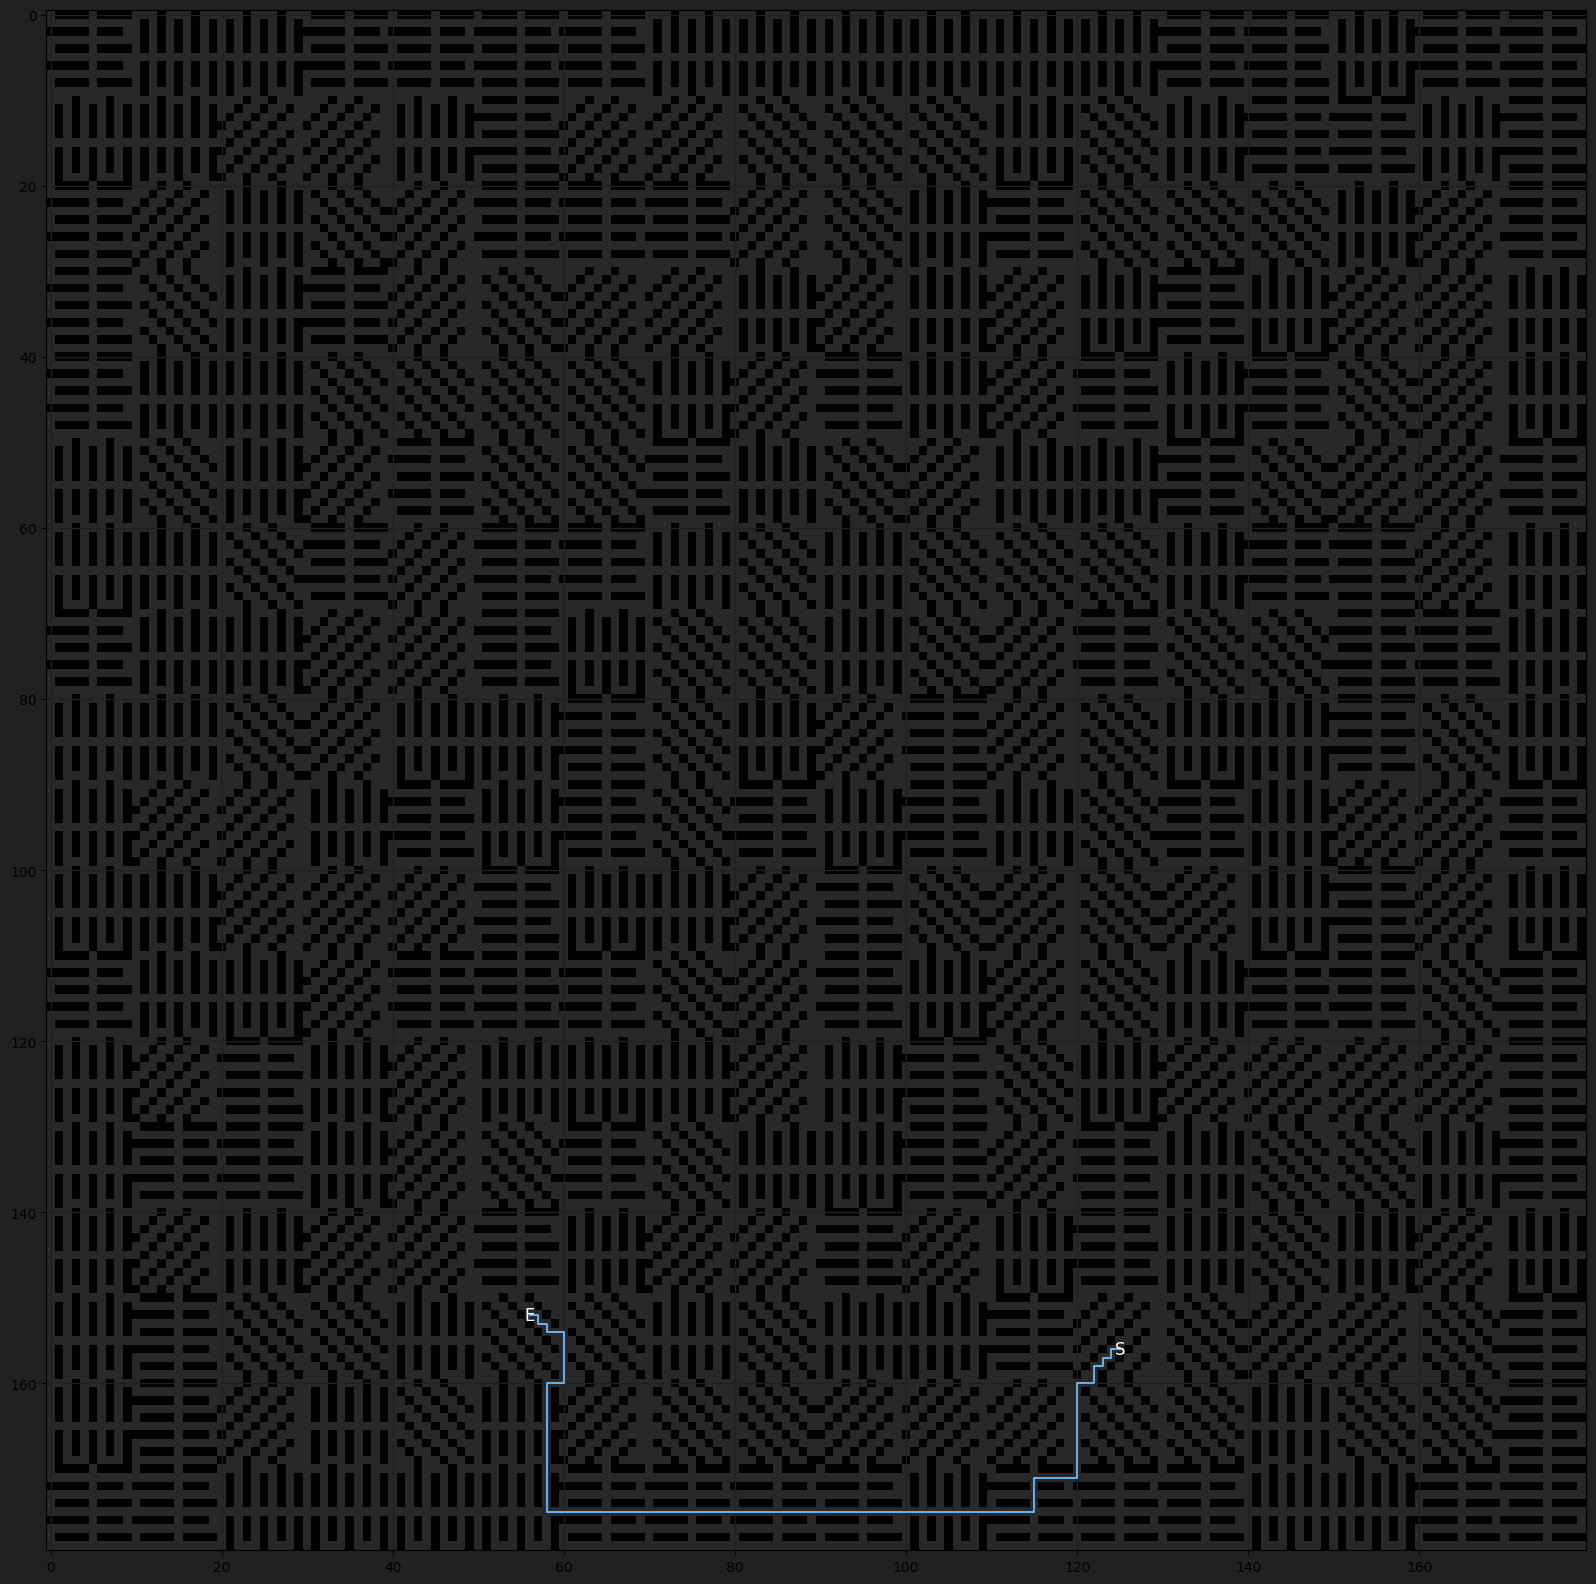

In [14]:
search_ida = Search(AlgorithmTypeEnum.IDA_STAR, env, HeuristicEnum.MANHATTAN)

search_ida.print_cost()

visualize_warehouse(env.map, search_ida.path)

In [4]:
t_diff = 0
iterations = 10
for _ in range(iterations):
    env = Environment(WarehouseTypeEnum.Regular, rows = 200, cols = 200)

    search_bfs = Search(AlgorithmTypeEnum.BFS, env)
    search_dijkstra = Search(AlgorithmTypeEnum.A_STAR, env)

    t_diff += search_bfs.total_search_time / search_dijkstra.total_search_time

average_ratio = t_diff / iterations
if average_ratio > 1:
    percentage_slower = (average_ratio - 1) * 100
    print(f"At average BFS finds a solution {percentage_slower:.2f}% slower than A*")
else:
    percentage_slower = (1 - average_ratio) * 100
    print(f"At average A* finds a solution {percentage_slower:.2f}% slower than BFS")

At average BFS finds a solution 6.66% slower than A*
